<a href="https://colab.research.google.com/github/sipocz/DataMiner/blob/main/DataMiner_20230219.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [268]:
import pandas as pd
import os
from bs4 import  BeautifulSoup

In [269]:
from google.colab import drive

In [270]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [271]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/"

In [272]:
fname="Eseményfeladatok _ RG - IT Service Management.html"


In [273]:
htmltext=open(path+fname)

In [274]:
ht=htmltext.read()

In [275]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows1=soup.find_all("tr", class_="list_row list_odd is-selected")
table_rows2=soup.find_all("tr", class_="list_row list_even is-selected")
table_rows=table_rows1+table_rows2

------------------------------------------------


In [276]:
len(table_rows)

224

In [277]:
a_row=table_rows[2].find_all("td",class_="vt")

In [278]:
a_row[7].div["timeago"]

'2021-11-04 09:53:51'

In [279]:
a_row[7].div.text

'2021-11-04 10:53:51'

In [280]:
def print_a_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link=a_row[0].a["href"]
    task_description=a_row[1].text
    inc_name=a_row[6].a["aria-label"].split(": ")[1]
    inc_link=a_row[6].a["href"]
    t_creation=a_row[8].div.text
    t_start=a_row[7].div.text
    t_end=a_row[9].div.text
    try:
        full_text=a_row[10]["title"]
    except:
        full_text="None"

    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print(a_row[1].text)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text descriptiopn:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])

In [281]:
data_list=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list.append(print_a_row(a_row,to_print=False))


In [282]:
print (len(data_list))

224


In [283]:
fname="Incidents _ RG - IT Service Management.html"

In [284]:
htmltext=open(path+fname)

In [285]:
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")


In [286]:
table_rows1=soup.find_all("tr",  class_="list_row list_odd ")
table_rows2=soup.find_all("tr",  class_="list_row list_even ")
table_rows=table_rows1+table_rows2

In [287]:
len(table_rows)

61

In [288]:
a_row=table_rows[2].find_all("td",class_="vt")

In [289]:
def print_incident_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link="https://richterprod.service-now.com/"+a_row[0].a["href"]
    task_description=a_row[4].text
    inc_name=task_id
    inc_link=task_link
    t_creation=a_row[11].div.text
    t_start=a_row[10].div.text
    t_end=a_row[12].div.text
    try:
        full_text1=a_row[4].text
    except:
        full_text1="None"

    
    try:
        full_text2=a_row[14]["title"]
    except:
        full_text2="None"
    full_text=full_text1+"\n"+full_text2
    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print("task description:",task_description)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text description:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])
    

In [290]:
data_list2=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list2.append(print_incident_row(a_row,to_print=False))

In [291]:
len(data_list2)


61

In [292]:
all_data_list=data_list+data_list2


In [293]:
len(all_data_list)

285

In [294]:
import pandas as pd


In [295]:
df=pd.DataFrame(all_data_list,columns=["Task","TaskLink","Desc","Inc","IncLink","Creation","Start","End","LongDesc"])

In [296]:
df[['Start', 'End', 'Creation']] = df[['Start', 'End', 'Creation']].apply(pd.to_datetime)

In [297]:
df["End_Delta"]=df["End"]-df["Start"]
df["End_Delta_sec"]=pd.to_numeric(df["End_Delta"]/1000000000)

In [298]:
df["Start_Delta"]=df["Start"]-df["Creation"]
df["Start_Delta_sec"]=pd.to_numeric(df["Start_Delta"]/1000000000)

In [299]:
df.sort_values(["Creation"],inplace=True,ignore_index=True)

In [300]:
df.reindex()

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec
0,TASK0216008,https://richterprod.service-now.com/incident_t...,"Az OV-01 TFL operátori állomás meghibásodott, ...",INC0118840,https://richterprod.service-now.com/incident.d...,2021-09-08 07:45:29,2021-09-08 07:48:13,2021-11-05 07:09:23,"Az operátori állomás meghibásodott, nem indíth...",57 days 23:21:10,5008870,0 days 00:02:44,164
1,TASK0225687,https://richterprod.service-now.com/incident_t...,T5 tartály vezérelt fűtése nem működik ezért b...,INC0126270,https://richterprod.service-now.com/incident.d...,2021-10-15 07:19:48,2021-10-15 07:19:53,2021-10-19 15:09:13,T5 tartály fűtése csak kézi üzemmódban működik...,4 days 07:49:20,373760,0 days 00:00:05,5
2,TASK0225759,https://richterprod.service-now.com/incident_t...,Nem tudom kinyomtatni a mérési eredményeket.,INC0126341,https://richterprod.service-now.com/incident.d...,2021-10-15 09:58:58,2021-10-15 09:59:21,2021-10-19 15:07:54,Nem tudom kinyomtatni a mérési eredményeket a ...,4 days 05:08:33,364113,0 days 00:00:23,23
3,TASK0227851,https://richterprod.service-now.com/incident_t...,nem tudunk nyomtatni,INC0127776,https://richterprod.service-now.com/incident.d...,2021-10-25 06:53:38,2021-10-25 06:53:42,2021-11-15 11:00:12,None,21 days 04:06:30,1829190,0 days 00:00:04,4
4,TASK0230843,https://richterprod.service-now.com/incident_t...,AZ RG-LAB rendszerből nem tudunk feladatot nyo...,INC0129902,https://richterprod.service-now.com/incident.d...,2021-11-04 10:53:28,2021-11-04 10:53:51,2021-11-04 13:30:30,"A feladatot ki lehet választani nyomtatásra, a...",0 days 02:36:39,9399,0 days 00:00:23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,INC0212666,https://richterprod.service-now.com/incident.d...,[DCS rendszerek dorog - hibajegy],INC0212666,https://richterprod.service-now.com/incident.d...,2023-02-09 11:30:05,2023-02-09 11:46:09,2023-02-09 13:10:09,[DCS rendszerek dorog - hibajegy]\nÉrintett re...,0 days 01:24:00,5040,0 days 00:16:04,964
281,INC0212840,https://richterprod.service-now.com/incident.d...,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,INC0212840,https://richterprod.service-now.com/incident.d...,2023-02-10 08:24:39,2023-02-10 08:24:39,NaT,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,NaT,-9223372036854775808,0 days 00:00:00,0
282,INC0213025,https://richterprod.service-now.com/incident.d...,[DCS rendszerek dorog - hibajegy],INC0213025,https://richterprod.service-now.com/incident.d...,2023-02-10 15:35:32,2023-02-10 15:35:39,2023-02-13 11:57:31,[DCS rendszerek dorog - hibajegy]\nNone,2 days 20:21:52,246112,0 days 00:00:07,7
283,INC0213469,https://richterprod.service-now.com/incident.d...,Terepi terminál nem jelenít meg semmilyen értéket,INC0213469,https://richterprod.service-now.com/incident.d...,2023-02-14 09:36:08,2023-02-14 09:36:08,NaT,Terepi terminál nem jelenít meg semmilyen érté...,NaT,-9223372036854775808,0 days 00:00:00,0


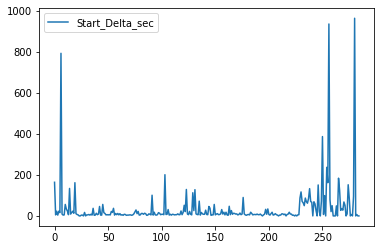

In [301]:
df.plot(y="Start_Delta_sec")

In [302]:
for i in range(len(df)):
    print(i,df.loc[i].TaskLink)

0 https://richterprod.service-now.com/incident_task.do?sys_id=fa348d90dbaa7090b4c40573f39619c5&sysparm_record_target=incident_task&sysparm_record_row=1&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
1 https://richterprod.service-now.com/incident_task.do?sys_id=6b212fccdb5f7854b4c40573f3961904&sysparm_record_target=incident_task&sysparm_record_row=2&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
2 https://richterprod.service-now.com/incident_task.do?sys_id=f6954458db5b74549fdbbb13f3961903&sysparm_record_target=incident_task&sysparm_record_row=3&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
3 https://richterprod.service-now.com/incident_task.do?sys_id=791bbe9bdbd3bc109fdbbb13f396198a&sysparm_record_target=incident_task&sysparm_record_row=4&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_cre

In [303]:
fname="INC0188514 _ Incidens _ RG - IT Service Management.html"
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/inc/"


In [304]:
htmltext=open(path+fname)
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")

In [305]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")


------------------------------------------------


In [306]:
table_rows[7]

<li class="h-card h-card_md h-card_comments"><div class="sn-card-component sn-card-component_first sn-card-component_meta sn-card-component_meta_sibling"><span class="sn-card-component-createdby">Rendszer</span></div><div class="sn-card-component sn-card-component_first sn-card-component_meta"><span class="sn-card-component-time"><span>E-mail elküldött</span><span class="sn-card-component_accent-bar_bullet">•</span><div class="date-calendar">2022-09-29 12:09:31</div><div class="datex date-timeago" data-original-title="5 hónappal ezelőtt" null="5 hónappal ezelőtt" timeago="2022-09-29 10:09:31" title="5 hónappal ezelőtt">5 hónappal ezelőtt</div></span></div><div class="sn-card-component sn-card-component_records"><div class="sn-widget"><ul class="sn-widget-list sn-widget-list-table"><li><span class="sn-widget-list-table-cell"><span class="icon-mail"></span></span><span class="sn-widget-list-table-cell">E-mail elküldött</span></li><li><span class="sn-widget-list-table-cell">Tárgy:</span><

In [307]:
def find_elements(el):
    temp=el.findChildren()
    return len(temp)

In [308]:
def incident_record_elements(incident_record, to_print=False):
    out=[]
    for child in incident_record.descendants:
        try:
            if find_elements(child)==0:
                if to_print:
                    print(child.text)
                out.append(child.text)
        except:
            pass
    return(out)
            

In [309]:
def get_all_html(path:str):
    import os
    files=os.scandir(path=path,)
    o=[a.name for a in files if "html" in a.name ]
    o.sort()
    return o


In [310]:
html_files = get_all_html(path)

In [311]:
html_files

['Eseményfeladatok _ RG - IT Service Management.html',
 'INC0182764 _ Incidens _ RG - IT Service Management.html',
 'INC0184094 _ Incidens _ RG - IT Service Management.html',
 'INC0185060 _ Incidens _ RG - IT Service Management.html',
 'INC0186693 _ Incidens _ RG - IT Service Management.html',
 'INC0186699 _ Incidens _ RG - IT Service Management.html',
 'INC0188514 _ Incidens _ RG - IT Service Management.html',
 'INC0188968 _ Incidens _ RG - IT Service Management.html',
 'INC0189031 _ Incidens _ RG - IT Service Management.html',
 'INC0189820 _ Incidens _ RG - IT Service Management.html',
 'INC0190538 _ Incidens _ RG - IT Service Management.html',
 'INC0190559 _ Incidens _ RG - IT Service Management.html',
 'INC0192385 _ Incidens _ RG - IT Service Management.html',
 'INC0192653 _ Incidens _ RG - IT Service Management.html',
 'INC0192657 _ Incidens _ RG - IT Service Management.html',
 'INC0192918 _ Incidens _ RG - IT Service Management.html',
 'INC0192933 _ Incidens _ RG - IT Service Ma

In [312]:
def critical_stepps(incident_record_list):
    '''
    Adatok strukturálása
    '''
    o=[]
    for incident_record in incident_record_list:
        incident_record_list=incident_record_elements(incident_record)
        
        if "ServiceNow - Incidens került a csoportodra | Incident has been assigned to your group" in incident_record_list:
            o1=f"0:csoporton:{incident_record_list[3]}"
            print(o1)
            o.append(o1)
        
        if "ServiceNow - Incidens került a nevedre | Incident has been assigned to you" in incident_record_list:
            o2=f"1:kollégán:{incident_record_list[3]}"
            print(o2)
            o.append(o2)
        if "Megoldott (véglegesen)" in incident_record_list:
            o3=f"2:megoldott:{incident_record_list[5]}"
            print(o3)
            o.append(o3)
        
        if "Megoldott (kerülő megoldás)" in incident_record_list:
            o4=f"2:megoldott (kerülővel):{incident_record_list[5]}"
            print(o4)
            o.append(o4)
        
        if "Nem megoldott (nem reprodukálható)" in incident_record_list:
            o5=f"2:megoldott (Nem megoldott de nem reprodukálható)):{incident_record_list[5]}"
            print(o5)
            o.append(o5)
    return o   
        
            


In [313]:
critical_stepps(table_rows)

2:megoldott:2022-09-29 13:56:46
1:kollégán:2022-09-29 12:35:02
0:csoporton:2022-09-29 12:09:31


['2:megoldott:2022-09-29 13:56:46',
 '1:kollégán:2022-09-29 12:35:02',
 '0:csoporton:2022-09-29 12:09:31']

In [314]:
def list_all_incident(path:str):
    html_files=get_all_html(path)
    #print(type(html_files))
    i=0
    out=[]
    for fname in html_files:
        out_rec=[]
        i+=1
        inc_name=fname.split(" ")[0]
        out_rec.append(inc_name)
        print(i,inc_name)
        htmltext=open(path+fname)
        ht=htmltext.read()
        soup=BeautifulSoup(ht,"html.parser")
        
        
        table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")

        ret=critical_stepps(table_rows)
        out_rec.append(len(ret))
        out_rec.append(ret)
        print("------------------------------------------------")
        out.append(out_rec)
    return out

In [315]:
o=list_all_incident(path)

1 Eseményfeladatok
------------------------------------------------
2 INC0182764
2:megoldott:2022-10-18 07:23:28
0:csoporton:2022-10-10 14:32:07
1:kollégán:2022-10-10 14:32:07
------------------------------------------------
3 INC0184094
2:megoldott:2022-10-14 14:29:04
1:kollégán:2022-10-10 13:17:31
0:csoporton:2022-10-10 13:15:56
------------------------------------------------
4 INC0185060
2:megoldott:2022-10-21 07:48:19
1:kollégán:2022-10-10 13:19:44
0:csoporton:2022-10-10 13:18:28
------------------------------------------------
5 INC0186693
2:megoldott (Nem megoldott de nem reprodukálható)):2022-12-20 14:19:50
1:kollégán:2022-10-10 13:57:45
0:csoporton:2022-10-10 13:22:50
------------------------------------------------
6 INC0186699
2:megoldott:2022-09-30 08:30:50
1:kollégán:2022-09-29 06:59:05
0:csoporton:2022-09-29 06:35:16
2:megoldott:2022-09-28 10:14:59
2:megoldott:2022-09-26 14:49:07
------------------------------------------------
7 INC0188514
2:megoldott:2022-09-29 13:56:4

In [316]:
o

[['Eseményfeladatok', 0, []],
 ['INC0182764',
  3,
  ['2:megoldott:2022-10-18 07:23:28',
   '0:csoporton:2022-10-10 14:32:07',
   '1:kollégán:2022-10-10 14:32:07']],
 ['INC0184094',
  3,
  ['2:megoldott:2022-10-14 14:29:04',
   '1:kollégán:2022-10-10 13:17:31',
   '0:csoporton:2022-10-10 13:15:56']],
 ['INC0185060',
  3,
  ['2:megoldott:2022-10-21 07:48:19',
   '1:kollégán:2022-10-10 13:19:44',
   '0:csoporton:2022-10-10 13:18:28']],
 ['INC0186693',
  3,
  ['2:megoldott (Nem megoldott de nem reprodukálható)):2022-12-20 14:19:50',
   '1:kollégán:2022-10-10 13:57:45',
   '0:csoporton:2022-10-10 13:22:50']],
 ['INC0186699',
  5,
  ['2:megoldott:2022-09-30 08:30:50',
   '1:kollégán:2022-09-29 06:59:05',
   '0:csoporton:2022-09-29 06:35:16',
   '2:megoldott:2022-09-28 10:14:59',
   '2:megoldott:2022-09-26 14:49:07']],
 ['INC0188514',
  3,
  ['2:megoldott:2022-09-29 13:56:46',
   '1:kollégán:2022-09-29 12:35:02',
   '0:csoporton:2022-09-29 12:09:31']],
 ['INC0188968',
  3,
  ['2:megoldott:2

In [317]:
incident_record_list=incident_record_elements(table_rows[4])

In [318]:
incident_record_list

['LK',
 '',
 'Lajos Kollár',
 'Munkamegjegyzések',
 '•',
 '2022-09-29 12:35:43',
 '5 hónappal ezelőtt',
 '',
 '',
 '']

In [319]:
'Megoldott (véglegesen) ' in incident_record_list

False

In [320]:
find_elements(table_rows[0])

31

In [321]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/task/"

In [322]:
html_files = get_all_html(path)

In [261]:
list_all_incident(path)

1 TASK0216008
------------------------------------------------
2 TASK0225687
------------------------------------------------
3 TASK0225759
------------------------------------------------
4 TASK0227851
------------------------------------------------
5 TASK0230843
------------------------------------------------
6 TASK0232153
------------------------------------------------
7 TASK0233522
------------------------------------------------
8 TASK0234168
------------------------------------------------
9 TASK0234169
------------------------------------------------
10 TASK0234244
------------------------------------------------
11 TASK0235078
------------------------------------------------
12 TASK0241059
------------------------------------------------
13 TASK0241109
------------------------------------------------
14 TASK0242057
------------------------------------------------
15 TASK0243081
------------------------------------------------
16 TASK0244980
----------------------------------

[['TASK0216008', 0, []],
 ['TASK0225687', 0, []],
 ['TASK0225759', 0, []],
 ['TASK0227851', 0, []],
 ['TASK0230843', 0, []],
 ['TASK0232153', 0, []],
 ['TASK0233522', 0, []],
 ['TASK0234168', 0, []],
 ['TASK0234169', 0, []],
 ['TASK0234244', 0, []],
 ['TASK0235078', 0, []],
 ['TASK0241059', 0, []],
 ['TASK0241109', 0, []],
 ['TASK0242057', 0, []],
 ['TASK0243081', 0, []],
 ['TASK0244980', 0, []],
 ['TASK0245960', 0, []],
 ['TASK0247841', 0, []],
 ['TASK0249064', 0, []],
 ['TASK0249194', 0, []],
 ['TASK0250093', 0, []],
 ['TASK0251112', 0, []],
 ['TASK0251735', 0, []],
 ['TASK0251736', 0, []],
 ['TASK0252041', 0, []],
 ['TASK0252332', 0, []],
 ['TASK0252604', 0, []],
 ['TASK0252718', 0, []],
 ['TASK0253194', 0, []],
 ['TASK0253220', 0, []],
 ['TASK0253416', 0, []],
 ['TASK0253673', 0, []],
 ['TASK0254794', 0, []],
 ['TASK0254914', 0, []],
 ['TASK0254915', 0, []],
 ['TASK0255138', 0, []],
 ['TASK0255140', 0, []],
 ['TASK0255141', 0, []],
 ['TASK0256289', 0, []],
 ['TASK0256464', 0, []],


In [262]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/emails/"

In [263]:
def fname_converter(fname:str, to_print=False):
    o=fname.split(".")[0].split("_")
    date_s=o[0].split("-")
    time_s=o[1].split("-")
    o=date_s+time_s
    out=f"{o[0]}-{o[1]}-{o[2]} {o[3]}:{o[4]}:{o[5]}"    
    if to_print:
        print(out)
    return(out)

In [264]:
fname_converter("2022-11-10_05-52-13.txt")

'2022-11-10 05:52:13'

In [265]:
import os
import time
email_files=os.scandir(path=path,)
email_files_data=[fname_converter(a.name) for a in email_files ]

In [266]:
email_files_data.sort()

In [267]:
email_files_data

['2022-01-26 08:54:28',
 '2022-01-26 08:59:22',
 '2022-01-26 09:08:06',
 '2022-01-26 09:09:37',
 '2022-01-26 09:13:52',
 '2022-01-26 09:38:25',
 '2022-01-26 10:15:58',
 '2022-01-26 13:09:19',
 '2022-01-26 13:20:49',
 '2022-01-26 13:29:19',
 '2022-01-26 13:41:19',
 '2022-01-27 09:50:03',
 '2022-01-27 09:50:08',
 '2022-01-27 11:18:07',
 '2022-01-27 11:27:16',
 '2022-01-27 12:32:55',
 '2022-01-28 07:20:28',
 '2022-01-28 09:48:48',
 '2022-01-28 10:50:41',
 '2022-02-01 13:10:10',
 '2022-02-01 13:37:37',
 '2022-02-02 13:48:00',
 '2022-02-02 14:02:42',
 '2022-02-03 08:07:28',
 '2022-02-03 08:10:15',
 '2022-02-03 08:15:14',
 '2022-02-05 07:55:34',
 '2022-02-09 01:41:44',
 '2022-02-09 08:00:57',
 '2022-02-10 06:57:53',
 '2022-02-11 12:03:50',
 '2022-02-14 07:27:50',
 '2022-02-14 07:47:16',
 '2022-02-14 09:40:40',
 '2022-02-16 09:59:31',
 '2022-02-19 11:44:52',
 '2022-02-23 07:06:21',
 '2022-02-25 12:13:16',
 '2022-02-25 13:08:47',
 '2022-02-28 10:31:31',
 '2022-03-03 07:23:48',
 '2022-03-03 12: